In [ ]:
!pip install sentileak
!pip install sentiment_analysis_spanish

import pandas as pd # Data frames
from gensim.utils import tokenize # Tokenizacion, saca simbolos y números (para otras funcionalidades, hacerlo a mano o buscar en nltk)
from gensim.matutils import corpus2csc # Llevar las listas de palabras a una descripción frecuentista
from gensim.corpora import Dictionary # Armado de base de palabras
from gensim.models import TfidfModel # Implementación del modelo tf-idf
import nltk # En este caso, únicamente para stopwords

from sentileak import dataloader
from sentileak import SentiLeak # Lexicon Based Method

from sentiment_analysis_spanish import sentiment_analysis # Supervised Machine Learning Based Aproach

import seaborn as sbn
import matplotlib.pylab as plt
import numpy as np
from wordcloud import WordCloud
nltk.download('stopwords')

     |████████████████████████████████| 20.1MB 47.2MB/s 
     |████████████████████████████████| 102kB 11.6MB/s 
ERROR: tensorflow 2.5.0 has requirement numpy~=1.19.2, but you'll have numpy 1.18.5 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Found existing installation: snowballstemmer 2.1.0
    Uninstalling snowballstemmer-2.1.0:
      Successfully uninstalled snowballstemmer-2.1.0


     |████████████████████████████████| 30.0MB 104kB/s 
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

#Datos Nuevos

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# filename = '/content/drive/My Drive/TP_final_Datos/Datos_con_sentimiento/2020_2_norm_comentarios.csv'
# filename2 = '/content/drive/My Drive/TP_final_Datos/Datos_con_sentimiento/2020_1_norm_comentarios.csv'
# filename3 = '/content/drive/My Drive/TP_final_Datos/Datos_con_sentimiento/2019_2_norm_comentarios.csv'
# filename4 = '/content/drive/My Drive/TP_final_Datos/Datos_con_sentimiento/2019_1_norm_comentarios.csv'
# filename5 = '/content/drive/My Drive/TP_final_Datos/Datos_con_sentimiento/2018_2_norm_comentarios.csv'
# filename6 = '/content/drive/My Drive/TP_final_Datos/Datos_con_sentimiento/2018_1_norm_comentarios.csv'
# filename7 = '/content/drive/My Drive/TP_final_Datos/Datos_con_sentimiento/2017_2_norm_comentarios.csv'
# filename8 = '/content/drive/My Drive/TP_final_Datos/Datos_con_sentimiento/2017_1_norm_comentarios.csv'
# filename9 = '/content/drive/My Drive/TP_final_Datos/Datos_con_sentimiento/2016_2_norm_comentarios.csv'
# filename10 = '/content/drive/My Drive/TP_final_Datos/Datos_con_sentimiento/2016_1_norm_comentarios.csv'


# df1 = pd.read_csv(filename)
# df2 = pd.read_csv(filename2)
# df3 = pd.read_csv(filename3)
# df4 = pd.read_csv(filename4)
# df5 = pd.read_csv(filename5)
# df6 = pd.read_csv(filename6)
# df7 = pd.read_csv(filename7)
# df8 = pd.read_csv(filename8)
# df9 = pd.read_csv(filename9)
# df10 = pd.read_csv(filename10)

In [ ]:
df = []
for i in range(2020-2001):
  for j in range(2):
    try:
      filename = '/content/drive/My Drive/TP_final_Datos/Datos_con_sentimiento/'+ str(2020-i) + '_' + str(2-j) + '_norm_comentarios.csv'
      df.append(pd.read_csv(filename))
    except:
      print('falta año', 2020-i, 'cuatri', 2-j)
      #df.append(np.nan)

In [ ]:
cuatri = []
for i in range(2020-2001):
  for j in range(2):
    cuatri.append(str(2-j)+' '+str(2020-i))

In [ ]:
#a = df1['Departamento'] == 'Departamento de Física'   df[df['ids'].str.contains("ball")]
#a = df3['Materia'] == contains'Física 1 (física)'
#df3[a]
df[1][df[1]['Departamento'].str.contains("Física")]

,Unnamed: 0,Unnamed: 0.1,Cuatrimestre,Departamento,Materia,Comentarios,Cant_comentarios,sentimiento,norm_coment
28,48,49,1ero 2020,Departamento de Física,Mecánica Clásica (Física),\n\nnos molesto a varios que no hayan determin...,28,36.0,1.285714
29,49,50,1ero 2020,Departamento de Física,Física 2 (Física),\n\ncreo que una sugerencia para mejorar las c...,7,26.0,3.714286
30,50,51,1ero 2020,Departamento de Física,Física 2 (Física),\n\nTener la clase grabada para poder volverla...,8,27.0,3.375000
31,51,52,1ero 2020,Departamento de Física,Introducción a Redes Complejas con Aplicacione...,\n\nTomas y Fede se preocupan por contestar y ...,9,8.0,0.888889
32,52,53,1ero 2020,Departamento de Física,Estructura de la Materia 3 (Física),\n\nYo veo las clases teoricas por youtube de ...,16,65.0,4.062500
33,53,54,1ero 2020,Departamento de Física,Astrofísica (Física),\n\nPrimero que nada agradecer a los profesore...,6,33.0,5.500000
34,54,55,1ero 2020,Departamento de Física,Física II (Química),\n\nUno de los ayudantes de la clase de proble...,14,38.0,2.714286
35,56,57,1ero 2020,Departamento de Física,Temas de Física (Matemática),\n\ntomaron cosas medio complicadas para el ni...,5,15.0,3.000000
36,57,58,1ero 2020,Departamento de Física,Física Teórica 1 (Física),\n\nQuisiera destacar la gran voluntad que est...,16,33.0,2.062500
37,58,59,1ero 2020,Departamento de Física,Dinámica No Lineal (Física),"\n\nMindlin muy buen profesor, su trato con lo...",7,18.0,2.571429


In [ ]:
def limpieza(df,columna, cant_comentarios_p_filtrar):
  df = df[df.Comentarios != '\n']
  df = df.dropna()
  filtro = df['Departamento'] != 'Secretaría Académica'
  df = df[filtro]
  df['Cant_comentarios'] = 0
  for i in df.index:
    df['Cant_comentarios'][i] = df[columna][i].count('\n\n')
  
  filt_coment = df['Cant_comentarios'] > cant_comentarios_p_filtrar
  df = df[filt_coment]
  return df

def aux(x):
  sentimental = SentiLeak()
  sentimental_x = sentimental.compute_sentiment(x)['per_sentence_sentiment']
  return (sum([s['score'] for s in sentimental_x])/(len(sentimental_x)))

def sentimiento(df, columna):
  sentimental = SentiLeak()
  df['sentimiento'] = df[columna].apply(lambda x: sum([s['score'] for s in sentimental.compute_sentiment(x)['per_sentence_sentiment']]))
  #df['sentimiento'] = df[columna].apply(aux)
  
  # df['long_palabras'] = 0
  # for i in df.index:
  #   df['long_palabras'][i] = len(df[columna][i].split(' ')) # hago una clumna con la informacion de cuantas palabras tiene cada fila del data frame
  
  df['norm_coment'] = df['sentimiento']/df['Cant_comentarios']
  return df


def analisis_dpt(df, columna):
  filtro = df['Departamento'] !=  'Comisión de Carrera de Profesorados de Enseñanza Media y Superior'
  df = df[filtro]
  filtro2 = df['Departamento'] !='CEFIEC'
  df = df[filtro2]
  filtro3 = df['Departamento'] !='Maestría en Data Mining'
  df = df[filtro3]
  filtro4 = df['Departamento'] != 'I.I.B'
  df = df[filtro4]
  # filtro5 = df['Departamento'] != 'Ciencias de la Atmósfera y los Océanos'
  #df = df[filtro5]
  dpt = df[columna].unique()
  puntaje_por_dto = []
  for i in range(len(dpt)):
    filtro_df = df[columna] == dpt[i]
    #puntaje_por_dto.append(df_sc[filtro_df]['norm_palabras'].sum())
    puntaje_por_dto.append((df[filtro_df]['norm_coment'].sum())/len(df[filtro_df]))

  return dpt, puntaje_por_dto


In [ ]:
# df1 = limpieza(df_2_2017, 'Comentarios', 3)
# df2 = limpieza(df_1_2017, 'Comentarios', 3)
# df3 = limpieza(df_2_2016, 'Comentarios', 3)
# df4 = limpieza(df_1_2016, 'Comentarios', 3)
# # df5 = limpieza(df_2_2018, 'Comentarios', 3)
# # df6 = limpieza(df_1_2018, 'Comentarios', 3)
# df1 = sentimiento(df1, 'Comentarios')
# df2 = sentimiento(df2, 'Comentarios')
# df3 = sentimiento(df3, 'Comentarios')
# df4 = sentimiento(df4, 'Comentarios')
# # df5 = sentimiento(df5, 'Comentarios')
# # df6 = sentimiento(df6, 'Comentarios')
# df4.to_csv('2016_1_norm_comentarios.csv')

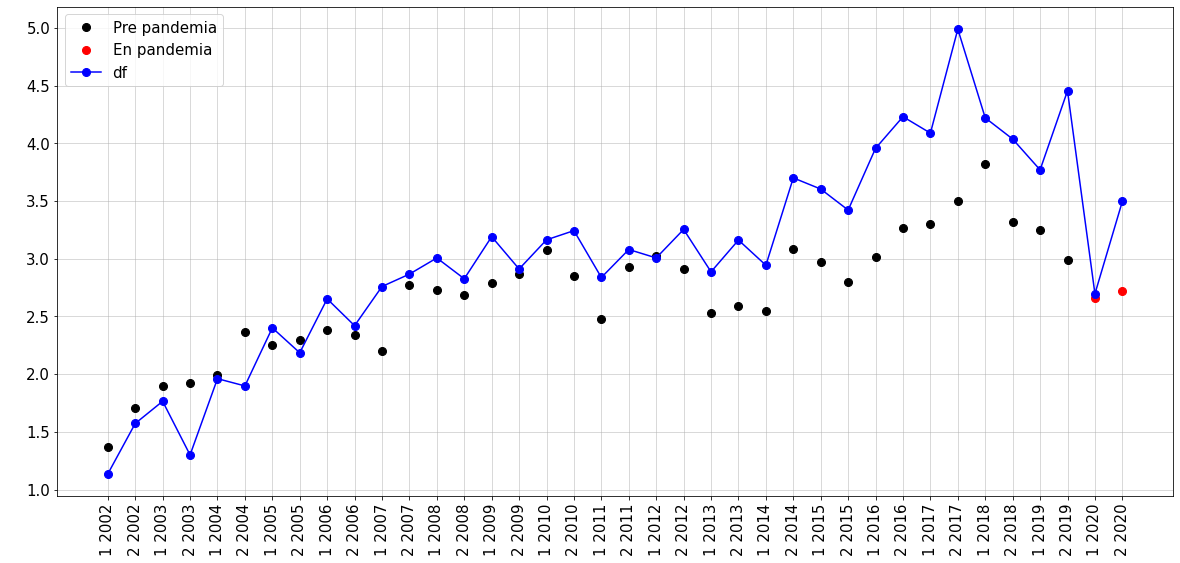

In [ ]:
cuatri_o = []
pos = []
for i in range(len(df)):
  pos.append(df[-i-1]['norm_coment'].sum()/len(df[-i-1]))
  cuatri_o.append(cuatri[-i-1])
x = np.arange(len(df))
plt.figure(figsize=(20,9))
with plt.rc_context({'axes.edgecolor':'black', 'xtick.color':'black', 'ytick.color':'black', 'figure.facecolor':'black'}):

  plt.plot(x[:36], pos[:36],'ko',label = 'Pre pandemia', markersize = 8)
  plt.plot(x[36:], pos[36:],'ro', label = 'En pandemia', markersize = 8)
  # plt.plot(x[36:], punto[36:][1])
  plt.plot(x, df_df, 'bo-', markersize = 8, label = 'df')
  # plt.plot(x[:36], punto[:36][0])
  plt.xticks(x, cuatri_o, rotation = 90, fontsize = 15)
  plt.yticks(fontsize = 15)
  plt.ylabel('Emotividad', fontsize = 15, color = 'white')
  plt.grid(True, alpha = 0.6)
  plt.legend(fontsize = 15, loc ='upper left')

plt.savefig('cuatrimestre_mas_df.pdf', transparent = True)

In [ ]:
df_df = []
for i in range(len(depto)):
  if -i-1 > -37:
    df_df.append(punto[-i-1][0])
    print(-i-1,'h')
  else:
    df_df.append(punto[-1-i][1])
    print(-i-1,'a')

-1 h
-2 h
-3 h
-4 h
-5 h
-6 h
-7 h
-8 h
-9 h
-10 h
-11 h
-12 h
-13 h
-14 h
-15 h
-16 h
-17 h
-18 h
-19 h
-20 h
-21 h
-22 h
-23 h
-24 h
-25 h
-26 h
-27 h
-28 h
-29 h
-30 h
-31 h
-32 h
-33 h
-34 h
-35 h
-36 h
-37 a
-38 a


In [ ]:
depto = []
punto = []
for i in range(len(df)):
  dpt, punt = analisis_dpt(df[i], 'Departamento')
  depto.append(dpt)
  punto.append(punt)#/np.sum(punt))
for i in range(len(df)):
  for j in range(len(depto[i])):
    if depto[i][j] == 'Ecología, Genética y Evolución':
      depto[i][j] = 'Ecología Genética y Evolución'
for i in range(2):
  for j in range(len(depto[i])):
    depto[i][j] = depto[i][j].replace('Departamento de ', '')

# dicti = {'departamento':depto, 'cuatri':cuatri_df, 'puntaje':punto}
# df_graf =pd.DataFrame.from_dict(dicti)
# df_graf
# np.sum(punto[2])
# for i in range(len(depto)):
#   plt.figure()
#   plt.title(cuatri_o[i])
#   plt.bar(depto[-i-1], punto[-1-i])
#   plt.xticks(rotation = 90)
#   plt.ylim([-0.25,5.3])
  #plt.savefig('/content/histo_depto'+str(cuatri_o[i].replace(' ','_'))+'.png', dpi = 1000)

In [ ]:
for i in range(len(depto)):
  print(depto[-i-1][1], -i-1)


Matemática -1
Matemática -2
Matemática -3
Matemática -4
Matemática -5
Matemática -6
Matemática -7
Matemática -8
Matemática -9
Matemática -10
Matemática -11
Matemática -12
Matemática -13
Matemática -14
Matemática -15
Matemática -16
Matemática -17
Matemática -18
Matemática -19
Matemática -20
Matemática -21
Matemática -22
Matemática -23
Matemática -24
Matemática -25
Matemática -26
Matemática -27
Matemática -28
Matemática -29
Matemática -30
Matemática -31
Matemática -32
Matemática -33
Matemática -34
Matemática -35
Matemática -36
Física -37
Física -38


In [ ]:
# for i in range(len(depto)):
#   print(punto[i])
#punto[20][9] = 0
depto[20][9]


'Ciencias de la Atmósfera y los Océanos'

In [ ]:
dicti = {'departamento':depto[-1], 'cuatri':cuatri_df[-1], 'puntaje':punto[-1]}
df_graf =pd.DataFrame.from_dict(dicti)
for i in range(len(depto)-1):
  dicti2 = {'departamento':depto[-i-2], 'cuatri':cuatri_df[-i-2], 'puntaje':punto[-i-2]}
  df_graf2 =pd.DataFrame.from_dict(dicti2)
  df_graf = df_graf.append(df_graf2)
df_graf.to_csv('data_a_grafica_todos_cuatris_a_ver.txt')

In [ ]:
# for i in range(len(depto)):
#   print(len(depto[i]))
#depto[0][6]
# depto[0] = np.delete(depto[0],[6])
# depto[1] = np.delete(depto[1],[6])
# punto[0] = np.delete(depto[0],[6])
# punto[1] = np.delete(depto[1],[6])

In [ ]:
cuatri_df = []
c= [20021,20022,20031,20032,20041,20042,20051,20052,20061,20062,20071,20072,20081,20082,20091,20092,20101,20102, 20111,20110,20121,20122,20131,20132,20141,20142,20151,20152,20161,20162,20171,20172,20181,20182,20191,20192,20201,20202]
for i in range(len(depto)):
  cuatri_a = []
  for j in range(len(depto[i])):
    cuatri_a.append(c[-1-i])
  cuatri_df.append(cuatri_a)

In [ ]:
import imageio
from IPython.display import Image

def hacer_gif(lista_nombres, archivo_salida):
    lista_imagenes = []
    for nombre_imagenes in lista_nombres:
        lista_imagenes.append((imageio.imread(nombre_imagenes)))
    # for i in range(len(lista_nombres)):
    #   lista_imagenes.append((imageio.imread(lista_imagenes[i])))
    imageio.mimsave(archivo_salida, lista_imagenes, fps = 800, **kargs)
    
kargs = {'duration' : 1}
imagenes = []
for i in range(len(cuatri_o)):
  imagenes.append('/content/histo_depto'+str(cuatri_o[i].replace(' ','_'))+'.png')
hacer_gif(imagenes, "/content/histo_depto.gif")
Image("histo_depto.gif", format = 'png', height= 1000)

In [ ]:
for i in range(len(depto)):
  print(sum(punto[i]))

In [ ]:
dp3[10] = 'Ecología Genética y Evolución'
for i in range(len(dp3)):
  if i<= len(dp3)-2:
    dp3[i] = 'Departamento de ' + dp3[i]

NameError: ignored

In [ ]:
filtro = df3['Departamento'] == 'Física'
df3[filtro]

#Nube de palabras por cuatri

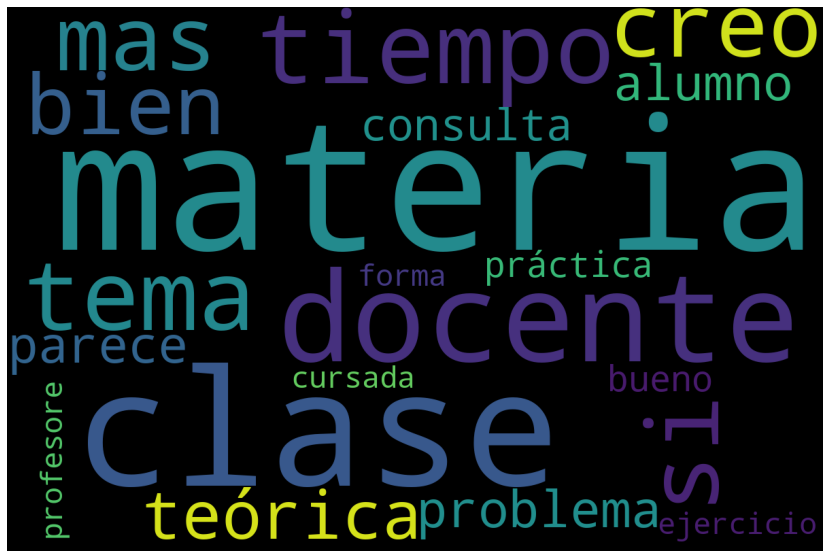

In [ ]:
#df3['Comentarios'][0] + ' ' + df3['Comentarios'][1]
import re
from wordcloud import WordCloud, STOPWORDS
from nltk.tokenize import word_tokenize

def comentario(df, columna):
  comentario = ''
  for i in df.index:
    comentario += df[columna][i] + ' '
  return comentario

def pro_texto(coment):
  coment = coment.apply(lambda letra: list(tokenize(letra.lower())))
  es_stop = nltk.corpus.stopwords.words('spanish')
  coment = coment.apply(lambda letra: list(filter(lambda palabra: palabra not in es_stop,letra)))
  base_palabras = Dictionary(coment.to_list())



com = comentario(df[1], 'Comentarios')
com = com.lower()

#com  = re.sub(r'==.*?==+', '', com)
com = com.replace('\n\n', ' ')
com = com.replace('\n', ' ')
com = com.replace('\r', ' ')

es_stop = nltk.corpus.stopwords.words('spanish')

# lista_sacar =['materia', 'si', 'bueno', 'cosa', 'profesor', 'profesora', 'docente', 'clase', 'tema', 'creo', 'parcial', 'solo', 'cursada', 'forma', 'parece', 'consulta', 'parte', 'práctica', 'alumno', 'excelente', 'problema', 'hora', 'momento', 'clases', 'nota', 'trabajo', 'teórica', 'más', 'mas', 'profe', 'tiempo']
# for i in range(len(lista_sacar)):
#   es_stop.append(lista_sacar[i])

def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(20, 10))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

wc_atributos = {'height' : 800,
                'width' : 1200,
                #'background_color' : 'white',
                'max_words' : 20}
#wordcloud = WordCloud(width = 300, height = 200, random_state=1, background_color='salmon', colormap='Pastel1', collocations=False, stopwords = es_stop).generate(com)
#plt.figure(figsize=(13,7))
wordcloud = WordCloud(**wc_atributos, stopwords = es_stop).generate(com)
plot_cloud(wordcloud)

#Nube de palabras

In [ ]:
def pre_procesaTexto(df, col_texto, tfidf = False, col_nombre = 'titulo', tipo_matriz = 'df'):
    """
    Esta función preprocesa los textos de un data frame.

    Es necesario pasarle:
        - df: pd.DataFrame()
          el data frame de nuestros datos
        - col_texto: str
          el nombre de la columna que contiene los textos
        - tfidf: Boolean (default = False)
          indica si queremos que nos devuelva la descripción tfidf o tf
        - col_nombre: str (default = 'titulo')
          indica cómo se quiere renombrar la matriz de textos en el espacio de términos
        - tipo_matris: str (default = 'df') puede ser df o scp
          si es df, devuelve un pandas dataframe
          si es scp, devuelve una matriz esparsa de scipy 
    Devuelve:
        - base_palabras: Dictionary de gensim
        - d_textos_terminos: pd.DataFrame
          data frame de palabras en el espacio de términos (es muy probable que esto haya que cambiarlo si la base de datos es muy grande)
    """
    df[col_texto + '_proc'] = df[col_texto].apply(lambda letra: list(tokenize(letra.lower())
                                                                )
                                                 ) # Línea para tokenizar (además, nos saca signos de puntuación y números!)
    
    es_stop = nltk.corpus.stopwords.words('spanish')
    es_stop.append('q')
    lista_sacar = ['leonardo', 'david', 'nancy','claudia','erijman','fué','mas','juan','pablo','laura','fer', 'guillem','milton','hernán','calvo', 'lucas','nacho', 'ferraro', 'maricel','alejandro','fernando','gabriela','azul','capeluto','graciela','jeremias','andrés','carlo', 'marina','mariano', 'leoni', 'matías','re','maru','martín','julio','soledad','súper']
    for i in range(len(lista_sacar)):
      es_stop.append(lista_sacar[i])
    df[col_texto + '_proc'] = df[col_texto + '_proc'].apply(lambda letra: list(filter(lambda palabra: palabra not in es_stop,
                                                                                      letra)
                                                                          )
                                                           ) # Línea para filtrar las stopwords
    base_palabras = Dictionary(df[col_texto + '_proc'].to_list()) # Construcción de la base entero - palabra
    df[col_texto + '_proc'] = df[col_texto + '_proc'].apply(lambda letra : base_palabras.doc2bow(letra)) # Descripción de los textos en función de la frecuencia de las palabras
    if tfidf:
        tf_idf = TfidfModel(df[col_texto + '_proc'].to_list(),
                            normalize = True) # De ser requerido, se entrena el modelo TF-IDF
        df[col_texto + '_proc'] = df[col_texto + '_proc'].apply(lambda letra: tf_idf[letra]) # Llevamos tf ------> tf-idf
    if tipo_matriz == 'df':
        d_textos_terminos = pd.DataFrame(corpus2csc(df[col_texto + '_proc']).T.todense(),
                                         columns = list(base_palabras.values()),
                                         index = df[col_nombre].to_list()
                                         ) # Armamos la matriz (en formato pandas) de textos en el espacio de términos
    elif tipo_matriz == 'scp':
        d_textos_terminos = corpus2csc(df[col_texto + '_proc']).T
    else:
        d_textos_terminos = 'No sé qué me pediste'

    return base_palabras, d_textos_terminos

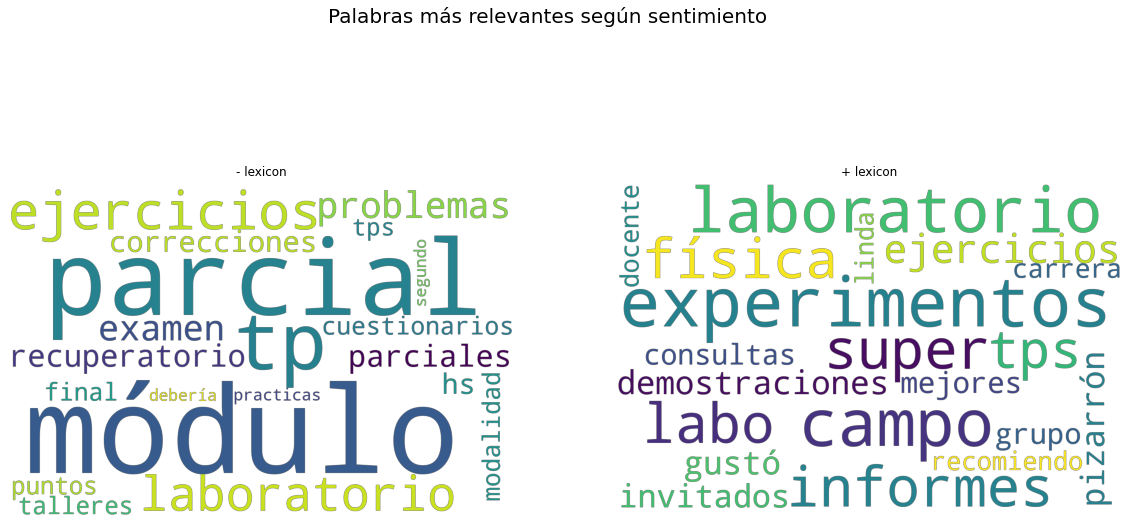

In [ ]:
base, d = pre_procesaTexto(df[2], 'Comentarios', tfidf = True, col_nombre='Materia')

DF_negativos_Lexicon = df[2].sort_values(by = 'norm_coment')[:40].Materia
DF_positivos_Lexicon = df[2].sort_values(by = 'norm_coment',ascending = False)[:40].Materia


wc_atributos = {'height' : 800,
                'width' : 1200,
                #'background_color' : 'white',
                'max_words' : 20
                } # Defino los parámetros que les voy a pasar a los wordclouds




wc_1 = WordCloud(mode = "RGBA", background_color=None, height = 800, width = 1200, max_words=20).generate_from_frequencies(d.loc[DF_negativos_Lexicon].sum().to_dict())

wc_2 = WordCloud(mode = "RGBA", background_color=None, height = 800, width = 1200, max_words=20).generate_from_frequencies(d.loc[DF_positivos_Lexicon].sum().to_dict())


fig, axs = plt.subplots(1, 2, figsize = (20,10))

fig.suptitle('Palabras más relevantes según sentimiento',
             fontsize = 20)

axs[0].set_title('- lexicon')
axs[0].imshow(wc_1)
axs[0].axis('off')

axs[1].set_title('+ lexicon')
axs[1].imshow(wc_2)
axs[1].axis('off')

plt.show()


In [ ]:
df[2].sort_values(by = 'norm_coment',ascending = False)[:40]
#df[2]['Comentarios'][95]

,Unnamed: 0,Unnamed: 0.1,Cuatrimestre,Departamento,Materia,Comentarios,Cant_comentarios,sentimiento,norm_coment,Comentarios_proc
6,6,6,2do 2019,Física,Física 4 (física),Claudia Giribet da muy lindas teóricas. Claras...,9,105.0,11.666667,"[(9, 0.04020167016490443), (22, 0.004997955994..."
109,112,112,2do 2019,Química Biológica,Química Biológica (química),Clases Prácticas: Lo único que tengo por decir...,10,84.0,8.400000,"[(22, 0.02203827173723339), (29, 0.01826871955..."
95,98,98,2do 2019,Ciencias Geológicas,Tectónica Andina (geología),Buena materia en lineas generales. Las teorica...,4,33.0,8.250000,"[(29, 0.0463802674427215), (122, 0.04172688532..."
46,46,46,2do 2019,Matemática,Álgebra II (matemática),Creo que las GUIAS PRACTICAS están desactualiz...,9,72.0,8.000000,"[(16, 0.02255586696643844), (22, 0.01041279210..."
133,143,143,2do 2019,"Ecología, Genética y Evolución",Limnología (biología),Aprendí muchisimo con las clases de esta mater...,9,69.0,7.666667,"[(3, 0.019322331012893473), (22, 0.00832384932..."
137,148,148,2do 2019,"Fisiología, Biología Molecular y Celular",Ingeniería Genética (biología),Creo que las clases de diseño de animales TG e...,9,66.0,7.333333,"[(16, 0.03167154201828588), (22, 0.00731049671..."
12,12,12,2do 2019,Física,Laboratorio 3 (física),"Bueno decir que la materia estuvo muy bien , n...",14,96.0,6.857143,"[(16, 0.01880690631741295), (22, 0.00434105250..."
139,150,150,2do 2019,"Fisiología, Biología Molecular y Celular",Neurofisiología Integrativa (biología),Es una buena materia y considero que aprendí ...,6,41.0,6.833333,"[(16, 0.026313975862232608), (18, 0.0426226081..."
63,63,63,2do 2019,Computación,"Problemas, Algoritmos y Programación (computac...",Me gustó mucho la materia. Como bien se advier...,4,27.0,6.750000,"[(121, 0.011855168590429807), (135, 0.02281062..."
23,23,23,2do 2019,Matemática,Análisis II (matemática),Bonder es un genio. Cursar con él fue lo mejor...,6,40.0,6.666667,"[(10, 0.03234514594202412), (22, 0.02290290707..."


In [ ]:
sentimental = SentiLeak() # Inicializamos el objeto
sentimental.compute_sentiment('Es una materia muy linda que desarrolla conceptos muy interesantes y nos abre la menta ante la posibilidad de diversas teorías evidenciando que nada es absoluto y hay que escuchar todos los puntos de vista. Muy dinámicas las clases de seminario, tal vez un poco extensas al prestar atención pero interesante a la hora de ver la variedad de estudios que pueden realizarse en función del objetivo qde estudio y terminar de comprender la dinámica de cada zona. Una muy linda materia.')

{'global_sentiment': 3.0,
 'per_sentence_sentiment': [{'position': 0,
   'score': 3.0,
   'text': 'Es una materia muy linda que desarrolla conceptos muy interesantes y nos abre la menta ante la posibilidad de diversas teorías evidenciando que nada es absoluto y hay que escuchar todos los puntos de vista.'},
  {'position': 1,
   'score': 2.0,
   'text': 'Muy dinámicas las clases de seminario, tal vez un poco extensas al prestar atención pero interesante a la hora de ver la variedad de estudios que pueden realizarse en función del objetivo qde estudio y terminar de comprender la dinámica de cada zona.'},
  {'position': 2, 'score': 3.0, 'text': 'Una muy linda materia.'}]}

In [ ]:
sentimental = SentiLeak() # Inicializamos el objeto
sentimental.compute_sentiment('El JTP de la materia tendria que repensar sus estragtegias de enseñansas. Se realizaron varios trabajos practicos, o parcialitos, que nunca se devolvieron, en todas las clases uno no sabe si esta enojado porque siempre que se le pregunta algo responde a gritos.')

{'global_sentiment': -2.0,
 'per_sentence_sentiment': [{'position': 0,
   'score': 0.0,
   'text': 'El JTP de la materia tendria que repensar sus estragtegias de enseñansas.'},
  {'position': 1,
   'score': -2.0,
   'text': 'Se realizaron varios trabajos practicos, o parcialitos, que nunca se devolvieron, en todas las clases uno no sabe si esta enojado porque siempre que se le pregunta algo responde a gritos.'}]}

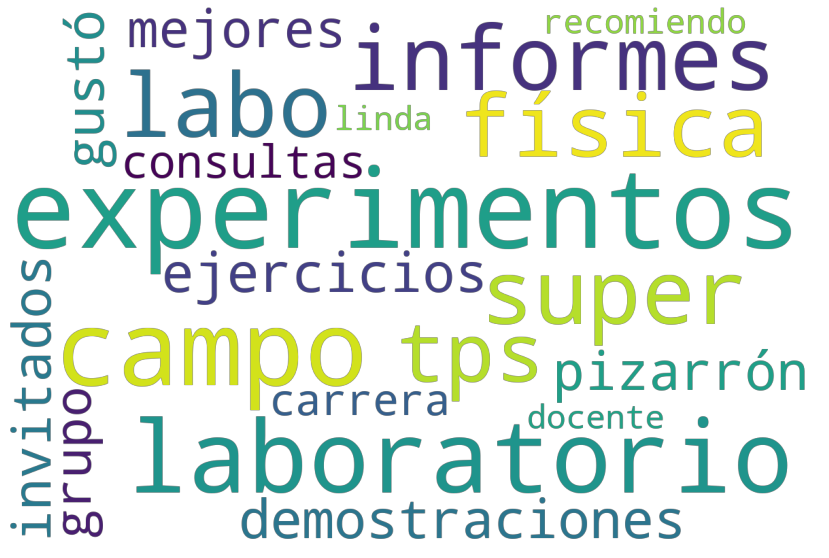

In [ ]:
wc_atributos = {'height' : 800,
                'width' : 1200,
                #'background_color' : 'white',
                'max_words' : 20
                } # Defino los parámetros que les voy a pasar a los wordclouds
wc_1 = WordCloud(mode = "RGBA", background_color=None, height = 800, width = 1200, max_words=20).generate_from_frequencies(d.loc[DF_negativos_Lexicon].sum().to_dict())
wc_2 = WordCloud(mode = "RGBA", background_color=None, height = 800, width = 1200, max_words=20).generate_from_frequencies(d.loc[DF_positivos_Lexicon].sum().to_dict())
plt.figure(figsize = (20,10))
plt.imshow(wc_2)
plt.axis('off')
plt.savefig('positivos_2019.png', transparent = True,dpi = 1000)

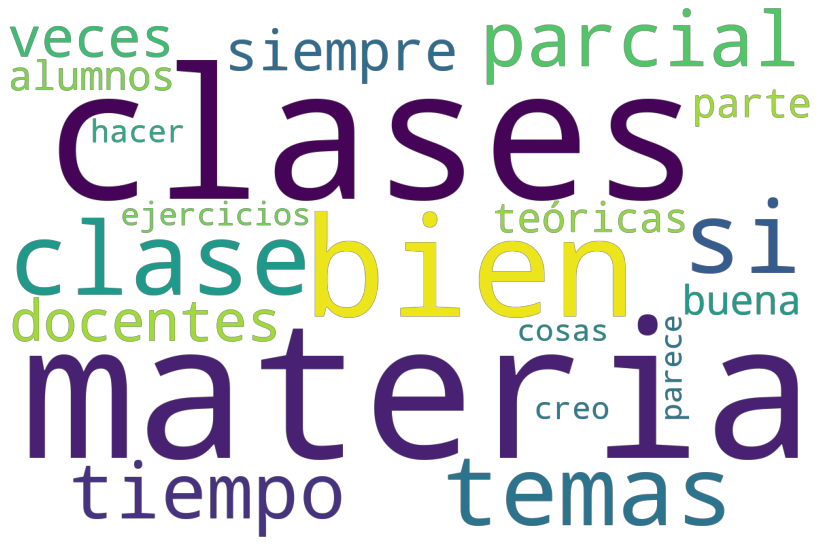

In [ ]:
# lista_sacar =['materia', 'si', 'bueno', 'cosa', 'profesor', 'profesora', 'docente', 'clase', 'tema', 'creo', 'parcial', 'solo', 'cursada', 'forma', 'parece', 'consulta', 'parte', 'práctica', 'alumno', 'excelente', 'problema', 'hora', 'momento', 'clases', 'nota', 'trabajo', 'teórica', 'más', 'mas', 'profe', 'tiempo']
ddf_nuevo = df[0]
for i in range((6)):
  ddf_nuevo = ddf_nuevo.append(df[i+1])

base, d = pre_procesaTexto(ddf_nuevo, 'Comentarios', tfidf = False, col_nombre='Materia')

DF_negativos_Lexicon = ddf_nuevo.sort_values(by = 'norm_coment')[:10000].Materia
wc_atributos = {'height' : 800,
                'width' : 1200,
                #'background_color' : 'white',
                'max_words' : 20
                } # Defino los parámetros que les voy a pasar a los wordclouds

wc_1 = WordCloud(mode = "RGBA", background_color=None, height = 800, width = 1200, max_words=20).generate_from_frequencies(d.loc[DF_negativos_Lexicon].sum().to_dict())

plt.figure(figsize = (20,10))
plt.imshow(wc_1)
plt.axis('off')
plt.savefig('muchos_cuatris_3.png',transparent = True, dpi = 1000)

In [ ]:
len(df[-10]['Materia'].unique())


124

In [ ]:
df[4].sort_values(by = 'norm_coment')#, ascending = False)

In [ ]:
# a = df[1]['Departamento'] == 'Departamento de Física'
# df[1][a]
df[1][df[1]['Materia'].str.contains('Matemática 1|Física 1', regex = True)]

,Unnamed: 0,Unnamed: 0.1,Cuatrimestre,Departamento,Materia,Comentarios,Cant_comentarios,sentimiento,norm_coment,Comentarios_proc
10,19,20,1ero 2020,Departamento de Matemática,Matemática 1 (Física),\n\npienso que seria mejor para organizarse el...,52,127.0,2.442308,"[(3, 0.016401152081249894), (5, 0.006643684875..."
53,82,83,1ero 2020,Departamento de Física,Física 1 (Física),\n\nles profes tienen la mejor predisposición ...,41,47.0,1.146341,"[(2, 0.009333346681775661), (5, 0.012747151157..."
54,83,84,1ero 2020,Departamento de Física,Física 1 (Física),"\n\nUn buen Maestro de TP , que por ejemplo te...",10,22.0,2.200000,"[(3, 0.021957041942970476), (13, 0.01734034939..."


#pruebas y datos viejos

In [ ]:
#dpt, puntaje  = analisis_dpt(df, 'Departamento')
fig, (ax1,ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (25,8))

ax2.bar(dp1,punt1, color = 'blue',label = '$1^{er}$ C 2020')
ax3.bar(dp2,punt2, color = 'red',label = '$2^{do}$ C 2020')
ax1.bar(dp3,punt3, color = 'green',label = '$2^{do}$ C 2019')
ax4.bar(dp1,punt1, color = 'blue', alpha = 0.5,label = '$1^{er}$ C 2020')
ax4.bar(dp2,punt2, color = 'red', alpha = 0.5,label = '$2^{do}$ C 2020')
ax4.bar(dp3,punt3, color = 'green', alpha = 0.5, label = '$2^{do}$ C 2019')

plt.legend()
ax1.tick_params(axis='x', rotation=90)
ax2.tick_params(axis='x', rotation=90)
ax3.tick_params(axis='x', rotation=90)
ax4.tick_params(axis='x', rotation=90)

dp1, punt1 = analisis_dpt(df1, 'Departamento')
dp2, punt2 = analisis_dpt(df2, 'Departamento')
dp3, punt3 = analisis_dpt(df3, 'Departamento')

#ax1.set_xticks(rotation = 90)
cuatri = ['1 2016', '2 1016','1 2017','2 2017','1 2018', '2 2018', '1 2019', '2 2019', '1 2020', '2 2020']
pos = []
df = [df10, df9,df8,df7,df6, df5, df4, df3, df2, df1]
for i in range(len(cuatri)):
  pos.append(df[i]['norm_coment'].sum()/len(df[i]))
#pos1 = df1['norm_coment'].sum()/len(df1)
x = [0,1,2,3,4,5,6,7,8,9]
plt.figure(figsize=(16,10))
plt.plot(x[0:8], pos[0:8], 'ok', label = 'Presencial')
plt.plot(x[8:],pos[8:], 'ro', label ='Virtual')
plt.xticks(x, cuatri)
plt.grid(True, alpha = 0.6)
plt.legend()
#print(pos,'\n', pos[4:])


depto = []
punto = []
for i in range(len(df)):
  dpt, punt = analisis_dpt(df[i], 'Departamento')
  depto.append(dpt)
  punto.append(punt)
for i in range(len(df)-2):
  depto[i][10] = 'Ecología Genética y Evolución'
  for j in range(len(depto[i])):
    if depto[i][j] !=   'Comisión de Carrera de Profesorados de Enseñanza Media y Superior':
      depto[i][j] = 'Departamento de '+depto[i][j]

fig, ax = plt.subplots(1, len(depto),figsize =(35, 10))
for i in range(len(depto)):
  ax[i].bar(depto[i], punto[i])
  ax[i].tick_params(axis='x', rotation=90)

# plt.plot(punto[0], 'o')
# depto[0]
# for i in range(len(depto)):
#   print(len(depto[i]))



pos1 = df1['norm_palabras'].sum()/len(df1)
pos2 = df2['norm_palabras'].sum()/len(df2)
pos3 = df3['norm_palabras'].sum()/len(df3)
print(f'sensibilidad del 2 do cuatri 2019: {pos3}\nsensibilidad del 1 er cuatri 2020: {pos1} \nsensibilidad del 2 do cuatri 2020: {pos2}')
#print(sum(punt1)/13, sum(punt2)/13)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
filename = '/content/drive/My Drive/TP_final_Datos/1_er_C_2020/departamentos.txt'
f = open(filename, 'r')
#print(f.read())
deptos = f.read().split(",")

df_sc  = df.dropna(subset=['Comentarios'])
df_sc = df_sc[df_sc.Comentarios != '. . ']
df_sc = df_sc[df_sc.Comentarios != '\n']
df_sc['Cant_comentarios'] = 0
for i in df_sc.index:
  df_sc['Comentarios'][i] = df_sc['Comentarios'][i].replace('. . ', '')
  df_sc['Cant_comentarios'][i] = df_sc['Comentarios'][i].count('\n\n')
df_sc_filt_com = df_sc['Cant_comentarios']>3
df_sc =df_sc[df_sc_filt_com]
df_sc

dpt = []
for i in range(len(deptos)):
  dpt.append(deptos[i].replace("'", "").replace("[","").replace("]","").strip())


dpt = []
for i in range(len(deptos)):
  dpt.append(deptos[i].replace("'", "").replace("[","").replace("]","").strip())

dpt[3] = dpt[3]+', '+dpt[4]
dpt.remove(dpt[4])
dpt[10] = dpt[10]+ ', '+dpt[11]
dpt.remove(dpt[11])
dpt

comentarios = []
for i in range(len(dpt)):
  f = open('/content/drive/My Drive/TP_final_Datos/1_er_C_2020/1_er_cuatri_2020' + str(dpt[i]) + '.txt','r')
  comentarios.append(f.read().replace("'","").replace("[","").replace("]","").strip())

import pandas as pd

data = {'Departamento':dpt, 'Comentario':comentarios}
DF = pd.DataFrame.from_dict(data)


sentimental = SentiLeak()
DF['lexicon_sentimiento'] = DF['Comentario'].apply(lambda x: sum([s['score'] for s in sentimental.compute_sentiment(x)['per_sentence_sentiment']]))
DF['long_letras'] = DF['Comentario'].str.len()


lon_p = []
for i in range(len(comentarios)):
  lon_p.append(len(comentarios[i].split(' ')))

DF['long_palabras'] = lon_p
DF['lex_norm'] = DF['lexicon_sentimiento']/DF['long_palabras']

import seaborn as sns
plt.bar( DF['Departamento'],DF['lex_norm'])
plt.xticks(rotation = 90)

In [ ]:
sentimental = SentiLeak()
df_sc['lexicon_sentimiento'] = df_sc['Comentarios'].apply(lambda x: sum([s['score'] for s in sentimental.compute_sentiment(x)['per_sentence_sentiment']]))
df_sc['long_letras'] = df_sc['Comentarios'].str.len()
# for i in range(len(comentarios)):
#   DF['long_palabras'][i] = len(DF['Comentario'][i].split(' '))

#DF['lexicon_sentimiento'] = (DF['lexicon_sentimiento'] - DF['lexicon_sentimiento'].min()) / (DF['lexicon_sentimiento'].max() - DF['lexicon_sentimiento'].min())
df_sc


dpt = df['Departamento'].unique()
df_sc = df_sc.rename(columns={'Unnamed: 0':'index_2'})

df_sc['long_palabras'] = 0
for i in df_sc.index:
  df_sc['long_palabras'][i] = len(df_sc['Comentarios'][i].split(' '))

df_sc['norm_letras'] = df_sc['lexicon_sentimiento']/(df_sc['long_letras'])
df_sc['norm_palabras'] = df_sc['lexicon_sentimiento']/(df_sc['long_palabras'])


puntaje_por_dto = []

for i in range(len(dpt)):
  filtro_df = df_sc['Departamento'] == dpt[i]
  puntaje_por_dto.append(df_sc[filtro_df]['norm_palabras'].sum())

plt.bar(dpt, puntaje_por_dto, label = 'lexicon')
plt.xticks(rotation = 90)

# df_sc['norm_palabras_ml'] = df_sc['ML_sentimiento']/(df_sc['long_palabras'])

# puntaje_por_dto_ml = []

# for i in range(len(dpt)):
#   filtro_df = df_sc['Departamento'] == dpt[i]
#   puntaje_por_dto_ml.append(df_sc[filtro_df]['norm_palabras_ml'].sum())

# plt.bar(dpt, puntaje_por_dto_ml, label = 'ML')
# plt.xticks(rotation = 90)
# plt.legend()

# Materias iniciales

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in double_scalars


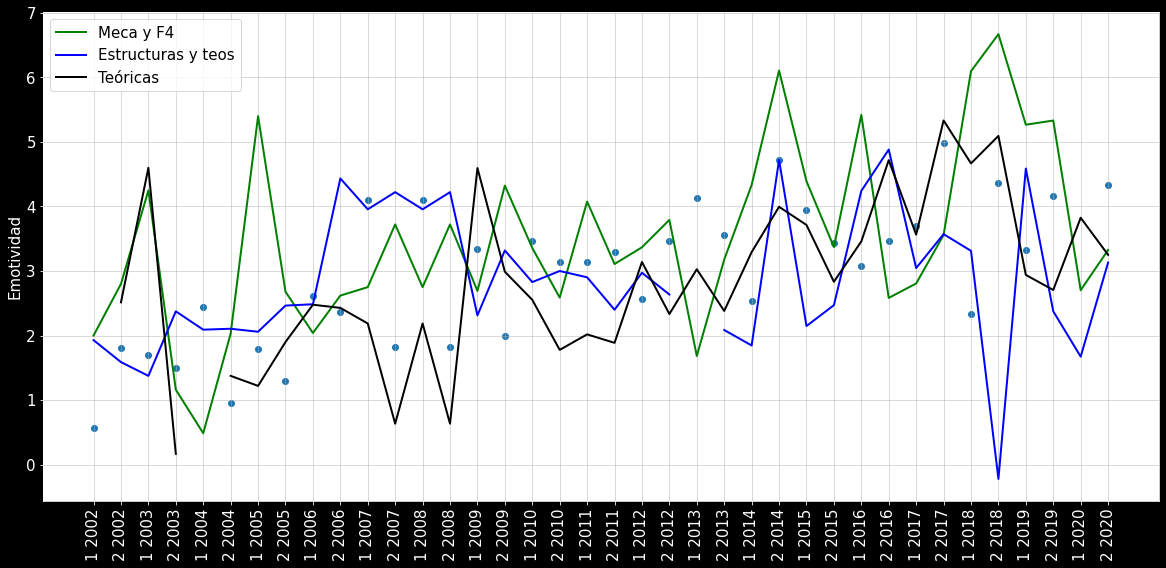

In [ ]:
df_a = []
df_b = []
df_c = []
df_d = []
df_e = []
for i in range(len(df)):
  df_a.append(df[i][df[i]['Materia'].str.contains('Laboratorio 1|Laboratorio 2|Laboratorio 3|Laboratorio 4|Laboratorio 5', regex = True)]) #esto se queda con los que contengan matemática 1 o física 1
  df_b.append(df[i][df[i]['Materia'].str.contains('Física Teórica', regex = True)])
  df_c.append(df[i][df[i]['Materia'].str.contains('Física 1')])
  df_d.append(df[i][df[i]['Materia'].str.contains('Estructura de la')])
  df_

   

cuatri_o = []
pos_a = []
pos_b = []
pos_c = []
pos_d = []
#pos_e = []


for i in range(len(df_a)):
  pos_a.append(df_a[-i-1]['norm_coment'].sum()/len(df_a[-i-1]))
  pos_b.append(df_b[-i-1]['norm_coment'].sum()/len(df_b[-i-1]))
  pos_c.append(df_c[-i-1]['norm_coment'].sum()/len(df_c[-i-1]))
  pos_d.append(df_d[-i-1]['norm_coment'].sum()/len(df_d[-i-1]))
  cuatri_o.append(cuatri[-i-1])
#for i in range(len(df_e)):
#  if len(df_e[-i-1]) != 0: #en los cuatris que no aparece la materia dividiría por 0, así que agrego esto para que le ponga un 0, se podría cambiar a que lo saltee
#    pos_e.append(df_e[-i-1]['norm_coment'].sum()/len(df_e[-i-1]))
#  else:
#    pos_e.append(0)
x = np.arange(len(df))
#x_2 = np.arange(len(df_e))

with plt.rc_context({'axes.edgecolor':'white', 'xtick.color':'white', 'ytick.color':'white', 'figure.facecolor':'black'}):

  plt.figure(figsize=(20,9))
  #plt.plot(x, pos_a,'r-', linewidth = 2,label = 'Labos 1,2,3,4 y 5')
  plt.scatter(x,pos_a, label = Labos 1,2,3,4 y 5)
  plt.plot(x, pos_b,'g-',  linewidth = 2,label = 'Teóricas')
  plt.plot(x, pos_c,'b-',  linewidth = 2,label = 'Estructuras y teos')
  plt.plot(x, pos_d,'k-',  linewidth = 2,label = 'Teóricas')
#plt.plot(x_2, pos_e,'y', label = 'Labos')


plt.xticks(x, cuatri_o, rotation = 90, fontsize =15)
plt.ylabel('Emotividad', fontsize = 15, color = 'white')
plt.yticks(fontsize = 15)

plt.grid(True, alpha = 0.6)
plt.legend(fontsize = 15)
#plt.savefig('Analisis_por_materias_con_meca.pdf', transparent = True)

In [ ]:
df_a[0]

,Unnamed: 0,Unnamed: 0.1,Cuatrimestre,Departamento,Materia,Comentarios,Cant_comentarios,sentimiento,norm_coment
40,60,61,2do 2020,Departamento de Física,Laboratorio 2 (Física),\n\nPara la modalidad virtual me pareció una m...,4,16.0,4.000000
41,61,62,2do 2020,Departamento de Física,Laboratorio 2 (Física),\n\nSi bien es raro cursar un laboratorio virt...,4,28.0,7.000000
42,62,63,2do 2020,Departamento de Física,Laboratorio 4 (Física),\n\nSe pusieron la 10 en este labo. Fue el que...,9,33.0,3.666667
44,66,67,2do 2020,Departamento de Física,Laboratorio 1 (Física),\n\nencuentro poco practico el tiempo en el qu...,9,27.0,3.000000
45,69,70,2do 2020,Departamento de Física,Laboratorio 1 (Física),\n\nNO RECOMIENDO esta cátedra en lo absoluto....,7,27.0,3.857143
55,83,84,2do 2020,Departamento de Física,Laboratorio 3 (Física),\n\nTodos los docentes de esta catedra realmen...,11,36.0,3.272727
71,112,113,2do 2020,Departamento de Física,Laboratorio 5 (Física),\n\nla verdad que esta muy bueno el laboratori...,7,39.0,5.571429


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in double_scalars


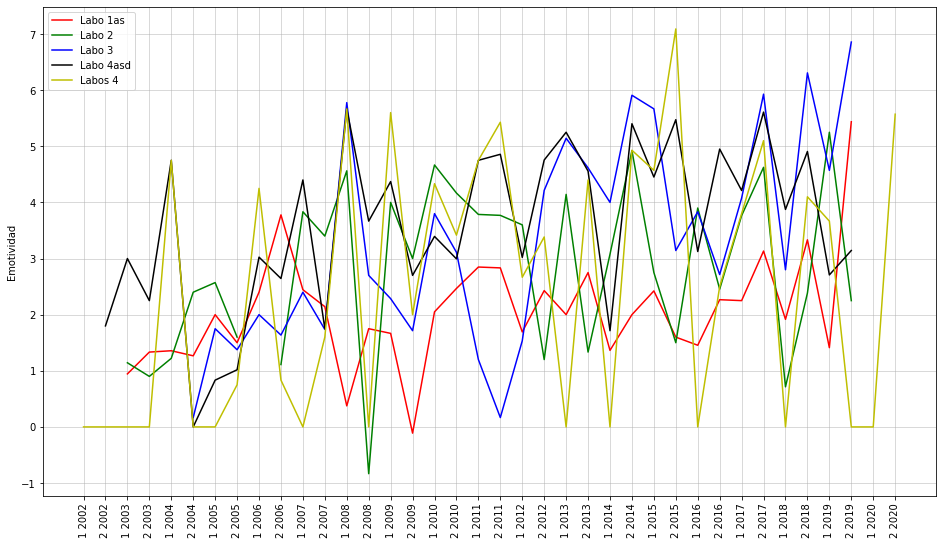

In [ ]:
df_a = []
df_b = []
df_c = []
df_d = []
df_e = []
for i in range(len(df)):
  df_a.append(df[i][df[i]['Materia'].str.contains('Laboratorio 1| Laboratorio 2| Laboratorio 3', regex = True)]) #esto se queda con los que contengan matemática 1 o física 1
  df_b.append(df[i][df[i]['Materia'].str.contains('Laboratorio 2', regex = True)])
  df_c.append(df[i][df[i]['Materia'].str.contains('Laboratorio 3', regex = True)])
  df_d.append(df[i][df[i]['Materia'].str.contains('Laboratorio 4|Laboratorio 5', regex = True)])
  df_e.append(df[i][df[i]['Materia'].str.contains('Laboratorio 5')])
  df_e[i] = df_e[i][df_e[i]['Departamento'].str.contains('Física')] #como hay laboratorios de otros deptos, me quedo solo con los de física, y lo hago así porque algunos dicen "departamento de.." y otros "física"
   

cuatri_o = []
pos_a = []
pos_b = []
pos_c = []
pos_d = []
pos_e = []


for i in range(len(df_a)):
  pos_a.append(df_a[-i-1]['norm_coment'].sum()/len(df_a[-i-1]))
  pos_b.append(df_b[-i-1]['norm_coment'].sum()/len(df_b[-i-1]))
  pos_c.append(df_c[-i-1]['norm_coment'].sum()/len(df_c[-i-1]))
  pos_d.append(df_d[-i-1]['norm_coment'].sum()/len(df_d[-i-1]))
  cuatri_o.append(cuatri[-i-1])
for i in range(len(df_e)):
  if len(df_e[-i-1]) != 0: #en los cuatris que no aparece la materia dividiría por 0, así que agrego esto para que le ponga un 0, se podría cambiar a que lo saltee
    pos_e.append(df_e[-i-1]['norm_coment'].sum()/len(df_e[-i-1]))
  else:
    pos_e.append(0)
x = np.arange(len(df))
x_2 = np.arange(len(df_e))

#with plt.rc_context({'axes.edgecolor':'white', 'xtick.color':'white', 'ytick.color':'white', 'figure.facecolor':'white'}):

plt.figure(figsize=(16,9))
plt.plot(x, pos_a,'r', label = 'Labo 1as')
plt.plot(x, pos_b,'g', label = 'Labo 2')
plt.plot(x, pos_c,'b', label = 'Labo 3')
plt.plot(x, pos_d,'k', label = 'Labo 4asd')
plt.plot(x_2, pos_e,'y', label = 'Labos 4')


plt.xticks(x, cuatri_o, rotation = 90)
plt.ylabel('Emotividad')
plt.grid(True, alpha = 0.6)
plt.legend()
#plt.savefig('Analisis_por_materias.png', transparent = True, dpi = 1000)

In [ ]:
df[2][df[2]['Materia'].str.contains('Laboratorio 1')]

,Unnamed: 0,Unnamed: 0.1,Cuatrimestre,Departamento,Materia,Comentarios,Cant_comentarios,sentimiento,norm_coment,Comentarios_proc
10,10,10,2do 2019,Física,Laboratorio 1 (física),Empiezo por Laura. La considero una gran d...,16,87.0,5.4375,"[(22, 0.03508677481136974), (26, 0.08548702869..."
